<a href="https://colab.research.google.com/github/marreapato/Explainable-AI-Time-Series/blob/main/PROJETO_XAI_LUCAS_RABELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##necessario baixar
!pip install TSInterpret


## **Explorando Explicabilidade em Classificação de Séries Temporais**

#### Projeto desenvolvido para a disciplina de Responsible AI do CIn - UFPE.

**Discente:** Lucas Rabelo

**Professor:** Ricardo Prudêncio

Nesse projeto visa-se explorar o tema da explicabilidade em classificação de séries temporais. A explicabilidade é uma área crucial da inteligência artificial, especialmente em contextos onde é importante compreender como os modelos tomam decisões. Para facilitar a análise da explicabilidade em classificação de séries temporais, foi utilizado o pacote TSinterpret do Python. Esse pacote, disponível em [GitHub](https://github.com/fzi-forschungszentrum-informatik/TSInterpret) e oferece ferramentas especializadas para interpretar e explicar modelos de aprendizado de máquina aplicados a séries temporais. (Todos são Métodos de explicação Local)

A classificação de séries temporais é uma tarefa desafiadora em que o objetivo é atribuir uma classe ou rótulo a uma sequência de dados ao longo do tempo. Diferentemente da classificação de dados estáticos, como imagens ou textos, as séries temporais envolvem padrões que variam ao longo de um eixo temporal. Isso pode incluir dados como séries financeiras, de saúde ou de sensores, onde a ordem e o contexto temporal são essenciais para a tomada de decisão.

Ao adotar um exemplo de série temporal do site (https://www.timeseriesclassification.com/index.php), que reúne uma variedade de conjuntos de dados para classificação de séries temporais, tornou-se possível aplicar métodos de interpretabilidade e entender como os modelos estão fazendo suas previsões ou classificações. Este projeto visa não apenas implementar modelos precisos, mas também fornecer insights sobre como esses modelos funcionam e por que tomam certas decisões em contextos de séries temporais.

### **Sobre a classificação de Séries Temporais**

O workshop disponibilizado em [YouTube](https://www.youtube.com/watch?v=e5qs9PG0HFM&t=16s) é uma excelente introdução ao tema. Nesse workshop, feito pela **Conferencia Internacional en IA** os conceitos fundamentais e os desafios específicos relacionados à classificação de séries temporais são abordados de forma acessível e informativa, pela Dra Elisa Fromont. Para quem está interessado em explorar mais profundamente a aplicação de técnicas de aprendizado de máquina em séries temporais e deseja obter uma base nesse campo, este workshop é altamente recomendado como ponto de partida.

Os slides da apresentação do workshop mencionado estão disponíveis para consulta em [http://people.irisa.fr/Elisa.Fromont/datafiles/TS_XAISifed.pdf](http://people.irisa.fr/Elisa.Fromont/datafiles/TS_XAISifed.pdf). Esses slides oferecem uma oportunidade adicional para revisar e aprofundar os conhecimentos compartilhados durante a apresentação, complementando assim a compreensão sobre classificação de séries temporais e suas aplicações.

No contexto do Workshop, foi utilizada a série temporal *GunPoint* como exemplo. O objetivo da análise é classificar momentos em que um indivíduo está segurando uma arma. Exemplo no Print Abaixo:

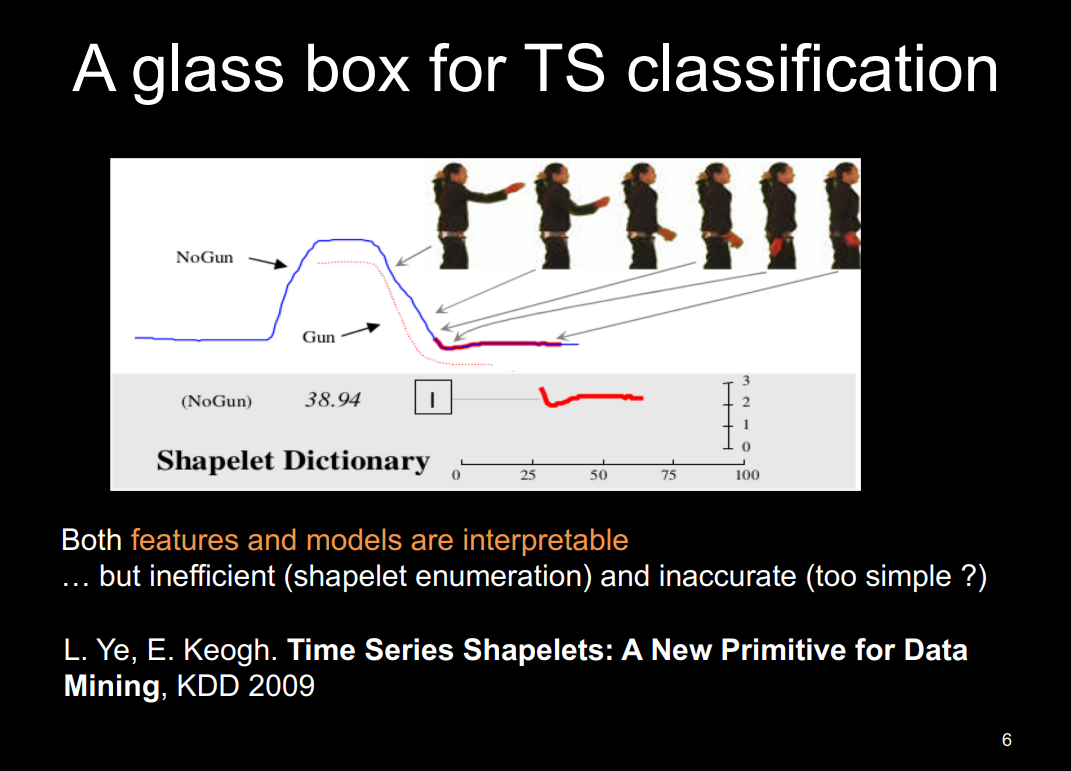



Essa classificação é realizada com base em conceitos como shapelets (ou ondaletas), que representam partes distintivas da série temporal. Em outras palavras, os shapelets capturam padrões específicos na série que correspondem à ação de levantar uma arma, permitindo assim a identificação e classificação precisa desses eventos com base na sequência temporal coletada por meio de um sensor. Essa abordagem demonstra como técnicas avançadas de análise de séries temporais podem ser aplicadas de forma prática e significativa em cenários do mundo real. Para a avaliação do Método a autora do workshop utiliza este exemplo com o gráfico do Print Abaixo: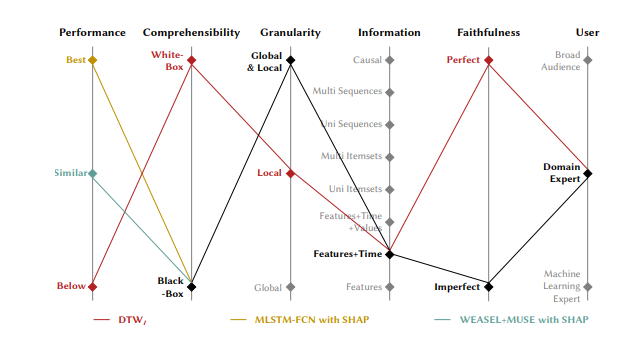

O framework proposto nesta [pesquisa](https://arxiv.org/abs/2005.14501) do print que foi utilizado pela autora do *workshop*, avalia e compara métodos de aprendizado de máquina em termos de desempenho e explicabilidade. Ele oferece uma abordagem estruturada para considerar características como desempenho do modelo, compreensibilidade, informações fornecidas para predições, confiabilidade das explicações e usuários-alvo das explicações.

### **Sobre os Dados e temática escolhida**

O Dataset escolhido para análise é o **ElectricDeviceDetection**, que se concentra na detecção de dispositivos elétricos em segmentos de imagens de raio-X em 3D. Os dados utilizados foram originados de uma segmentação não supervisionada de imagens de raio-X em 3D, onde as séries representam **histogramas de intensidades** e não séries temporais convencionais. O conjunto de dados consiste em 4390 casos. Cada série possui um comprimento de 256. As classes de interesse são rotuladas como 0 (**sem dispositivo elétrico**) e 1 (**com dispositivo elétrico**), refletindo a presença ou ausência de dispositivos elétricos nos segmentos de imagens de raio-X. Este problema apresenta desafios únicos de classificação, requerendo métodos adaptados para analisar e interpretar os histogramas de intensidades a fim de realizar com precisão a detecção de dispositivos elétricos nessas imagens. O estudo que foi publicado no ano de 2020 pode ser econtrado em [Detecting Electric Devices in 3D Images of Bags
](https://arxiv.org/abs/2005.02163).

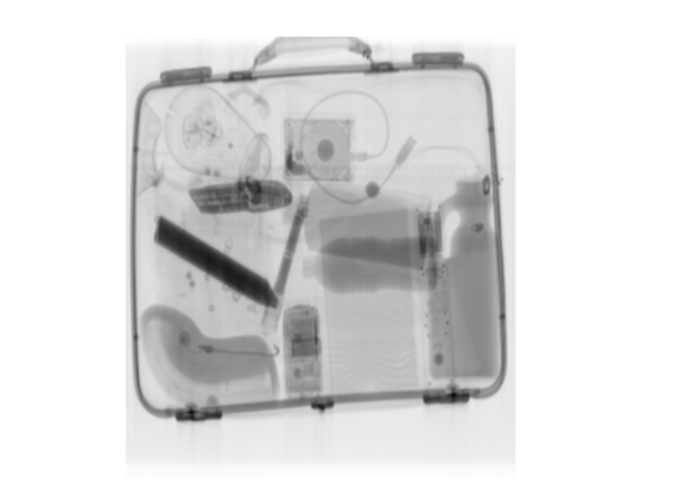

Imagem de raio X de Maleta

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snst
from tslearn.datasets import UCR_UEA_datasets#download do pacote
import tensorflow as tf
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load data.

dataset='ElectricDeviceDetection'
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)
#enc1=OneHotEncoder(sparse=False).fit(train_y.reshape(-1,1))
#train_y=enc1.transform(train_y.reshape(-1,1))
#test_y=enc1.transform(test_y.reshape(-1,1))

Fazendo o Pré-Processamento dos Dados

In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(624, 256, 1) (624,) (3768, 256, 1) (3768,)


Juntando os dados

In [ ]:
# Concatenar
merged_array_X = np.concatenate((train_x, test_x), axis=0)
merged_array_y = np.concatenate((train_y, test_y), axis=0)
print(merged_array_X.shape, merged_array_y.shape)

(4392, 256, 1) (4392,)


Checando por valores NA e medidas estatísticas

In [ ]:
print(np.unique(np.isnan(merged_array_X)))

[False]


In [ ]:
np.unique(merged_array_y)#sem valores NA ou vazios

array(['0', '1'], dtype='<U1')

Os valores devem ser representados como intensidades, portanto a intensidade mínima é 0 e a máxima 1293656. Em média os valores de intensidade das séries são 665,31

In [ ]:
print("Minimo: "+str(merged_array_X.min())+" Maximo: "+str(merged_array_X.max())+" Media: "+str(merged_array_X.mean()))

Minimo: 0.0 Maximo: 1293656.0 Media: 665.3049765553848


As classes na descrição do site (https://www.timeseriesclassification.com/description.php?Dataset=ElectricDeviceDetection), estão na ordem Classe 0: Sem dispositivo eletrônico e Classe 1: dispositivo Eletrônico. No total são 611 séries de dispotivos eletrônicos e 3781 sem dispositivos eletrônicos.

In [ ]:
print(np.unique(merged_array_y,return_counts=True))

(array(['0', '1'], dtype='<U1'), array([3781,  611]))


Procurando a quantidade de computadores e de notebooks, fica evidente que o problema pode é de classes desbalanceadas e pode ser feito uma divisão estratificada nos conjuntos de treino e teste para manter as proporções.

In [ ]:
# Contar a frequência de cada classe
unique_classes, class_counts = np.unique(merged_array_y, return_counts=True)
unique_classes=unique_classes.astype(str)
unique_classes = np.where(unique_classes == "0", "Sem dispositivo eletrônico", unique_classes)
unique_classes[unique_classes=="1"]="Dispositivo Eletrônico"
unique_classes

array(['Sem dispositivo eletrônico', 'Dispositivo Eletrônico'],
      dtype='<U26')

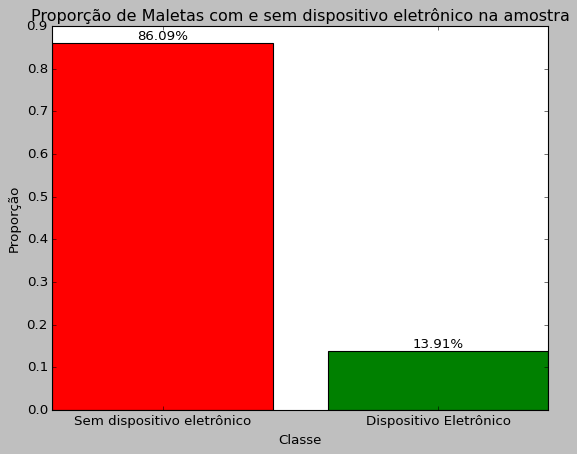

In [ ]:

# Calcular a proporção de cada classe
class_proportions = class_counts / np.sum(class_counts)

# Definir cores para cada classe
colors = ["r", "g"]  # Altere conforme o número de classes

# Plotar o gráfico de barras
plt.bar(unique_classes, class_proportions, color=colors)

# Adicionar rótulos de porcentagem em cada barra
for i in range(len(unique_classes)):
    plt.text(unique_classes[i], class_proportions[i], f"{class_proportions[i]:.2%}", ha="center", va="bottom")

# Definir rótulos e título
plt.xlabel("Classe")
plt.ylabel("Proporção")
plt.title("Proporção de Maletas com e sem dispositivo eletrônico na amostra")

# Mostrar o gráfico
plt.show()

Nos exemplos que serão analisados abaixo, é possível notar uma diferença aparente entre as séries temporais com dispositivo e sem dispositivo, **todas as séries com dispositivo apresentam um grande crescimento no final**, no entanto pode ser apenas por ocasião aleatória, além disso é difícil para o ser humano leigo reconhecer a diferença entre as duas séries temporais. Por esse motivo a IA pode ser um grande aliado no reconhecimento desses padrões.

**Maleta sem Dispositivo:**

In [ ]:
c_indexes = np.where(merged_array_y == '0')[0]#indices do array sem dispositivos eletronicos

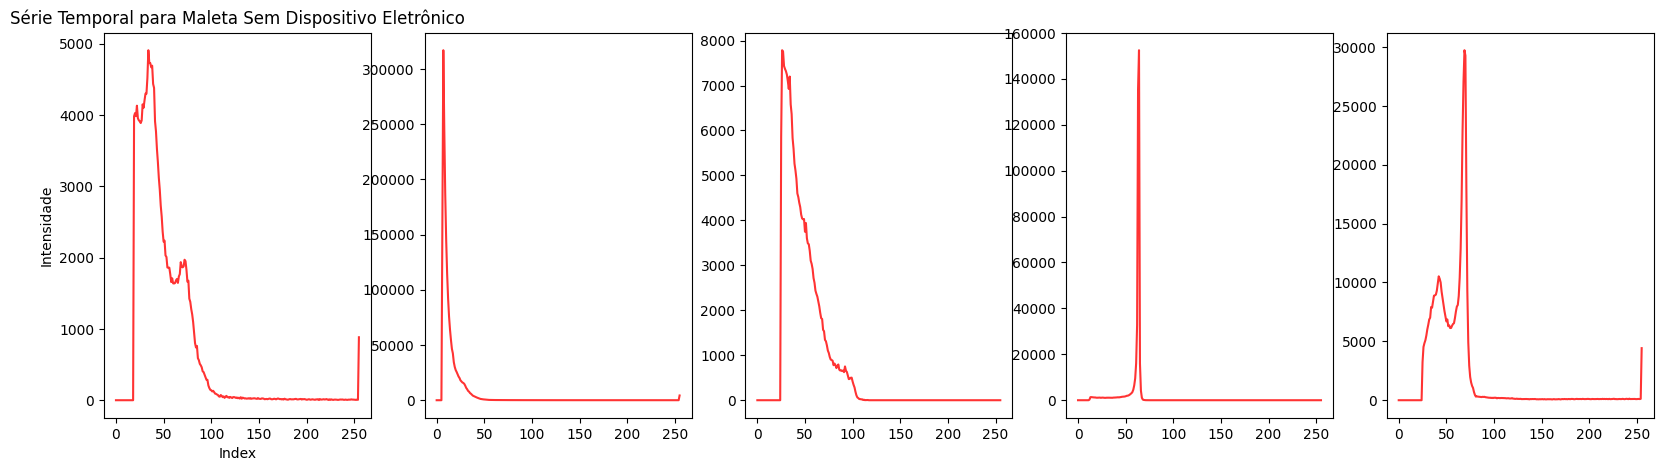

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

classe = 'Sem Dispositivo Eletrônico'

# Create a line plot of the array
axes[0].plot(merged_array_X[c_indexes[0]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[1].plot(merged_array_X[c_indexes[1]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[2].plot(merged_array_X[c_indexes[2]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[3].plot(merged_array_X[c_indexes[3]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[4].plot(merged_array_X[c_indexes[4]], color='red',alpha = 0.8)

# Set labels and title for the plot
axes[0].set_xlabel('Index')

axes[0].set_ylabel('Intensidade')


axes[0].set_title('Série Temporal para Maleta '+classe)


# Show the plot
plt.show()

**Maleta Com Dispositivo**

In [ ]:
c_indexesy = np.where(merged_array_y == '1')[0]#indices do array com dispositivos eletronicos

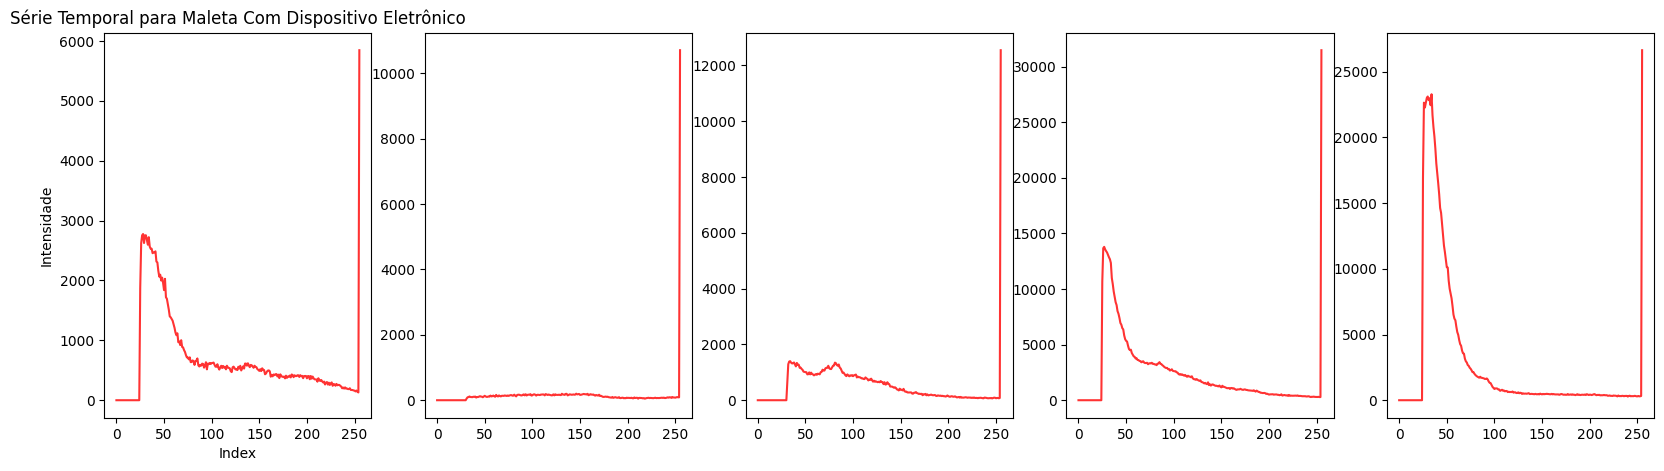

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

classe = 'Com Dispositivo Eletrônico'

# Create a line plot of the array
axes[0].plot(merged_array_X[c_indexesy[0]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[1].plot(merged_array_X[c_indexesy[1]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[2].plot(merged_array_X[c_indexesy[2]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[3].plot(merged_array_X[c_indexesy[3]], color='red',alpha = 0.8)
# Create a line plot of the array
axes[4].plot(merged_array_X[c_indexesy[4]], color='red',alpha = 0.8)

# Set labels and title for the plot
axes[0].set_xlabel('Index')

axes[0].set_ylabel('Intensidade')


axes[0].set_title('Série Temporal para Maleta '+classe)


# Show the plot
plt.show()

Como enfrentamos um desbalanceamento significativo entre as classes "sem dispositivo" e "com dispositivo" nos dados. Para garantir que nosso modelo de aprendizado de máquina seja treinado de forma equilibrada e eficaz, aplicamos uma técnica de *oversampling*. O oversampling envolveu a geração de cópias adicionais dos exemplos da classe minoritária ("com dispositivo") para igualar o número de exemplos da classe majoritária ("sem dispositivo") - esse é o funcionamento da técnica.

Essa abordagem ajudou a corrigir o viés introduzido pelo desbalanceamento, permitindo que o modelo aprendesse de maneira mais equitativa e pudesse identificar com mais precisão os padrões associados à presença ou ausência de dispositivos elétricos nos dados. Ao superar o desafio do desbalanceamento por meio do oversampling, melhoramos a capacidade do modelo de generalizar e realizar previsões mais confiáveis em situações reais de detecção de dispositivos elétricos.

In [ ]:
from sklearn.utils import resample

# Separate minority and majority classes
minority_class = merged_array_X[merged_array_y == "1"]
majority_class = merged_array_X[merged_array_y == "0"]

# Perform oversampling on the minority class
oversampled_minority_class = resample(minority_class,
                                      replace=True,  # Sample with replacement
                                      n_samples=len(majority_class),  # Match majority class size
                                      random_state=42)  # Set random state for reproducibility

# Combine oversampled minority class with majority class
X_resampled = np.concatenate([majority_class, oversampled_minority_class])
y_resampled = np.concatenate([np.zeros(len(majority_class)), np.ones(len(oversampled_minority_class))])

# Now, X_resampled and y_resampled contain the balanced dataset
# Use X_resampled and y_resampled for model training

Após a aplicação do Oversampling temos 50% em cada classe

In [ ]:
np.unique(y_resampled,return_counts=True)

(array([0., 1.]), array([3781, 3781]))

A separação entre treinamento e teste levou em consideração o princípio de Pareto com 20% dos dados para teste e 80% para treinamento. Além disso foram utilziados os dados após a aplicação do Oversampling

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2,
                                                    stratify=y_resampled,
                                                    random_state=42)

# Now, X_train, X_test, y_train, y_test contain the split datasets
# X_train and y_train are the training features and labels
# X_test and y_test are the test features and labels

# Print shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6049, 256, 1)
Shape of X_test: (1513, 256, 1)
Shape of y_train: (6049,)
Shape of y_test: (1513,)


O Modelo utilizado foi o TimeSeriesSVC, Link para Documentação [Aqui](https://tslearn.readthedocs.io/en/latest/gen_modules/svm/tslearn.svm.TimeSeriesSVC.html). O TimeSeriesSVC é uma extensão do algoritmo SVC tradicional para lidar especificamente com dados de séries temporais. Este modelo é projetado para realizar tarefas de classificação em séries temporais, levando em consideração a estrutura temporal dos dados. Na documentação também está disponibilizada uma fonte que inspirou o desenvolvimento do modelo, vale notar que utilizar um modelo SVC da biblioteca sklearn não funciona com os modelos de explicabilidade, pois o modelo parece não "capturar" a informação temporal.

O modelo atingiu uma boa acurácia de 99,73% com um tempo de treinamento relativamente baixo em comparação com redes neurais.

In [ ]:
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax

model = TimeSeriesSVC(kernel="rbf", gamma="auto", probability=True,random_state=4)
model.fit(X_train, y_train)
print("Correct classification rate:", model.score(X_test, y_test))

pred_y=  model.predict(X_test)

Correct classification rate: 0.9973562458691342


O report de classificação, com um F1-score de 1.00 para ambas as classes indica um desempenho perfeito do modelo para ambas as classes (ou quase perfeito, lembrando que o valor de 1 é apenas uma aproximação), considerando precisão e recall. No contexto da classe 0.0, a precisão de 0.99 indica que, entre todas as previsões feitas pelo modelo para a classe 0.0, 99% delas foram realmente corretas, a quantidade absoluta fica mais fácil de visualizar na matriz de confusão.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute classification report
report = classification_report(y_test, pred_y)
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test, pred_y)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       757
         1.0       1.00      0.99      1.00       756

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513

Confusion Matrix:
 [[757   0]
 [  4 752]]


O modelo previu 4 vezes que não havia dispositivo eletrônico na mala, quando na verdade havia. Apesar de ser um erro sério, já que é preferível prever que há dispositivo quando na verdade não há, o percentual de erro é muito baixo, fazendo com que o modelo seja estatisticamente viável de ser utilziado.

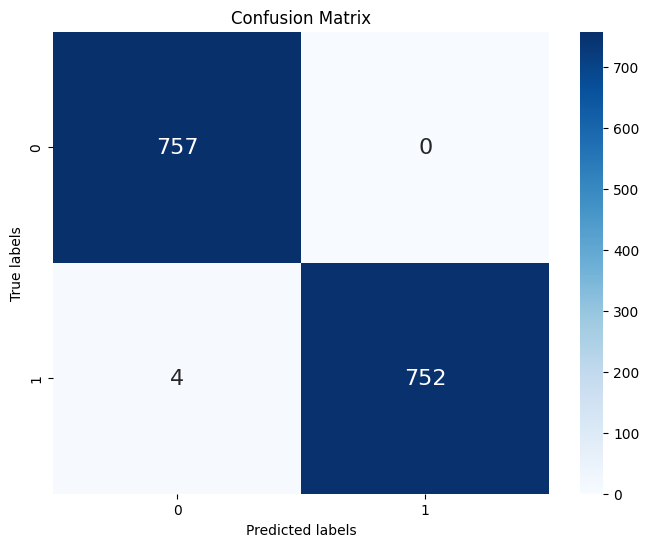

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
snst.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## **Leftist** - Modelo Agnostico de Explicabilidade Local

O modelo faz parte da biblioteca TSinterpret e está presente no Paper [Guillemé, Maël, et al. "Agnostic local explanation for time series classification." 2019 IEEE 31st International Conference on Tools with Artificial Intelligence (ICTAI). IEEE, 2019.](https://ieeexplore.ieee.org/document/8995349). Em que os autores adaptaram o LIME para classificação de séries temporais e propõem o uso de shapelets pre-fixados (tanto baseados no comprimento quanto na posição) como os componentes interpretáveis e fornecem a importância de cada shapelet como característica. O modelo é um modelo Agnostico, podendo tanto ser utilizado em modelos tradicionais de Machine Learning quanto em modelos de Deep Learning.

Como foi notado no trabalho, pode ser necessária uma adaptação dos modelos tradicionais para que eles lidem com a estrutura de uma série temporal, para que o LEFTIST consiga produzir explicações. Na Figura Abaixo é explicitada a relação entre modelo, LEFTIST (Função g(x)) e os pesos dos componentes interpretáveis que são gerados.



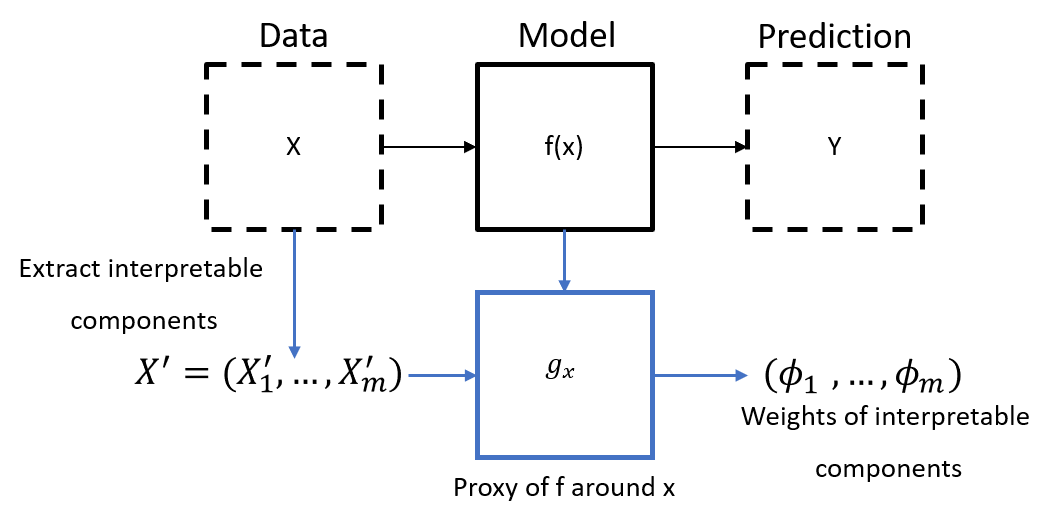

Para Classe Com Dispositivo Eletrônico. Foi utilizado o vetor de índices criado anteriormente, em que foi utilizado a primeira imagem com dispositivo eletrônico. Os processos de aprendizado utilizam os valores "LIME" mas também podem utilizar os Shappley Values, apesar de apenas providenciarem uma explicação local, inclusive na utilziação do SHAP. A transformação utilizada foi a Uniforme.

In [ ]:
explained_instance = merged_array_X[c_indexesy[0]]#indices do array com dispositivos eletronicos]
learning_process_name = 'Lime'
transform_name = 'uniform'

In [ ]:
X_test[np.where(y_test == 1)[0][3],:,:].shape

(256, 1)

O modelo é passado para a função LEFTIST, o argumento mode, muda a formatação necessária para o preprocessamento dos dados, ou seja, o shape do array teria que ser diferente. O Backend utilziado foi o SciKit Learn, o tamanho da explicação utilizado foi 1, no entanto tamanhos maiores podem ser utilizados, e o gráfico gerará janelas de "feature importance", dando uma importância para cada uma das janelas de tempo. NB_neighbors é a quantidade de vizinhos utilizadas para os cálculos, já que LIME gera explicação derivadas localmente de instâncias que são geradas na vizinhança da instância a ser explicada.

In [ ]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST


leftist = LEFTIST(model,(X_train,y_train),mode = "time", backend='SK',
                  learning_process_name='Lime',transform_name=transform_name, explanation_size=1,nb_neighbors=1000)

label='1'

Abaixo "1" é o label, ou seja a previsão de que há dispositivo eletrônico

In [ ]:
explanations = leftist.explain(explained_instance,1)

Abaixo o gráfico gerado pelo método LEFTIST, mostra a janela mais importante para a contribuição positiva (caso o label seja 1), ou seja, a janela de tempo entre o 84 e 96, foi a que mais contribuiu para a previsão de que existe um dispositivo eletrônico nessa maleta.

time mode
(1, 256)
(1, 256)
-1
1
0


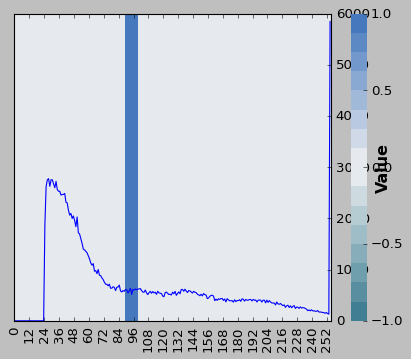

In [ ]:
leftist.plot(np.array([explained_instance]),np.array([explanations[0]]))

Para a Classe Sem Dispositivo Eletronico foi utilizada a terceira imagem dos exemplos mostrados anteriormente.

---



In [ ]:
merged_array_X[c_indexes[0]].shape

(256, 1)

In [ ]:
explained_instance = merged_array_X[c_indexes[2]]#indices do array sem dispositivos eletronicos]
learning_process_name = 'Lime'
transform_name = 'uniform'

In [ ]:
merged_array_X[c_indexes[0]].shape

(256, 1)

In [ ]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST


leftist = LEFTIST(model,(X_train,y_train),mode = "time", backend='SK',
                  learning_process_name='Lime',transform_name=transform_name, explanation_size=1,nb_neighbors=1000)

label='0'

O label utilziado foi 0, ou seja, ausência de dispositivo eletrônico.

In [ ]:
explanations = leftist.explain(explained_instance,0)

Nessa explicação a janela de tempo do 86 até o 94 também foi a que mais contribuiu para a previsão de que não há dispositivos eletrônicos na maleta.

time mode
(1, 256)
(1, 256)
-1
1
0


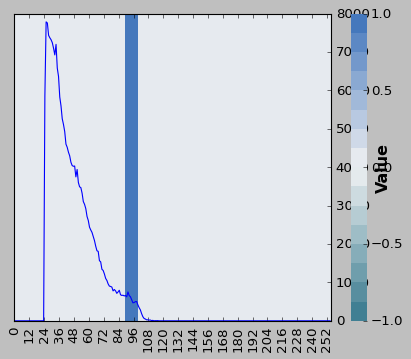

In [ ]:
leftist.plot(np.array([explained_instance]),np.array([explanations[0]]))

Quanto ao método LEFTIST, no artigo os autores escrevem:

"The experiments show that our approach has a
high fidelity: locally, the explanations provided approximate
well complex black-box classifiers such as SVM, Learning
Shapelets and ResNet"

Concluindo que o modelo possui alta fidelidade, sendo portanto um modelo interessante para usar nesse caso. Alguns pontos negativos foram observados na implementação do LEFTIST, como por exemplo, a necessidade de um pré-processamento específico no modelo para que a função de explicação possa ser utilziada, já que as features são as unidades de tempo. Além disso em alguns casos que foram experimentados o modelo não atribuiu nenhuma importância a nenhuma das janelas de tempo. Essas explicações do LEFTIST podem atender melhor um especialista da área, pois para um leigo total no assunto pode ser difícil entender o motivo da janela de tempo ser a mais importante.

Explicação Por ContraFactuais pode ser melhor para um leigo enteder, visto que, explica uma previsão baseada no que ela não é. Ou seja, existe um dispositivo eletrônico pois a série temporal possui um formato X e não Y. Diversos métodos estão disponíveis, mas o escolhido foi o COMTE, presente também na [documentação](https://fzi-forschungszentrum-informatik.github.io/TSInterpret/Notebooks/Ates_torch/). O COMTE foi desenvolvido por [Emre Ates, Burak Aksar, Vitus J. Leung, Ayse K. Coskun](https://arxiv.org/abs/2008.10781:). O método é agnóstico Local, dentre os argumentos da função é possível escolher entre dois métodos do otimização, no trabalho seguimos com o método brute. A explicação abaixo foi desenvolvida para um exemplo em que não há dispositivo eletrônico.

In [ ]:
from TSInterpret.InterpretabilityModels.counterfactual.COMTECF import COMTECF

exp_model= COMTECF(model,(X_train,y_train),mode='time', backend='SK', method= 'brute')

In [ ]:
item = merged_array_X[c_indexes[2]]#indices do array sem dispositivos eletronicos]

y_target= 0

In [ ]:
item.shape

(256, 1)

In [ ]:
exp = exp_model.explain(item.reshape(1,256,1))


In [ ]:
array, label=exp


A classe predita é "Ausência de Dispositivo Eletrônico", nesse caso a classe foi predita dessa maneira, pois ela não é igual a classe do contraexemplo (em cor rosa no gráfico abaixo). Essa explicação é mais intuitiva para pessoas leigas visualizarem a diferença entre as duas séries e entenderem como a classificação foi realizada pelo modelo.

(1, 256, 1)


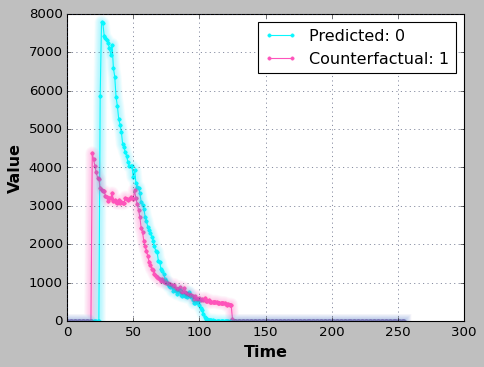

In [ ]:
%matplotlib inline
org_label=0#predito
cf_label=1#contrafactual
exp=array
print(exp.shape)
exp_model.plot_in_one(np.array(item.reshape(1,-1,1)),org_label,np.array(exp[0]),cf_label)

#### **Temporal Saliency Rescaling (Mapa de Calor)**
O Framework Tensorflow também foi utilizado, pois um modelo que não é agnostico (pois depende de gradientes para funcionar) foi testado, o modelo é o TSR (
Temporal Saliency Rescaling). No entanto a performance da rede neural não foi tão boa quanto a performance do SVM, por este motivo, e considerando o gráfico de avaliação de explicabilidade no início do trabalho, não seria interessante utilizá-lo. Apesar de ser improtante explorar como a explicabilidade é desenvolvida nesse método.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc1=OneHotEncoder(sparse=False).fit(y_train.reshape(-1,1))
train_y=enc1.transform(y_train.reshape(-1,1))
test_y=enc1.transform(y_test.reshape(-1,1))

O modelo de redes neurais possuia uma camada LSTM e a função de ativação Softmax (Necessária para utilizar a função de explicabilidade, sem ela não é possível)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Assuming train_x shape is (num_samples, time_steps, num_features)
num_time_steps = train_x.shape[1]
num_features = train_x.shape[2]
num_classes = 2  # Number of output classes (adjust as needed)

model = Sequential([
    LSTM(64, input_shape=(num_time_steps, num_features)),  # LSTM layer with 64 units
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(loss='categorical_crossentropy',  # Use sparse categorical crossentropy for integer targets
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17026 (66.51 KB)
Trainable params: 17026 (66.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
num_epochs = 10
batch_size = 32

model.fit(X_train, train_y, epochs=num_epochs, batch_size=batch_size)


Epoch 1/10
190/190 [==============================] - 13s 70ms/step - loss: 0.4901 - accuracy: 0.7810
Epoch 2/10
190/190 [==============================] - 17s 89ms/step - loss: 0.4609 - accuracy: 0.8008
Epoch 3/10
190/190 [==============================] - 13s 69ms/step - loss: 0.4851 - accuracy: 0.7876
Epoch 4/10
190/190 [==============================] - 13s 70ms/step - loss: 0.4502 - accuracy: 0.8071
Epoch 5/10
190/190 [==============================] - 13s 69ms/step - loss: 0.4477 - accuracy: 0.8119
Epoch 6/10
190/190 [==============================] - 14s 72ms/step - loss: 0.4222 - accuracy: 0.8167
Epoch 7/10
190/190 [==============================] - 14s 72ms/step - loss: 0.4112 - accuracy: 0.8160
Epoch 8/10
190/190 [==============================] - 13s 69ms/step - loss: 0.3973 - accuracy: 0.8281
Epoch 9/10
190/190 [==============================] - 13s 70ms/step - loss: 0.3920 - accuracy: 0.8304
Epoch 10/10
190/190 [==============================] - 13s 69ms/step - loss: 0.387

In [ ]:
# Assuming train_y and test_y are one-hot encoded
# Convert one-hot encoded labels back to integer labels
train_labels = np.argmax(train_y, axis=1)
test_labels = np.argmax(test_y, axis=1)

# Assuming you have already trained your model
# model.fit(X_train, train_labels)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate classification report
print("Classification Report:")
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

# Calculate confusion matrix
conf_mat = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_mat)

48/48 [==============================] - 1s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       757
           1       0.80      0.90      0.85       756

    accuracy                           0.84      1513
   macro avg       0.84      0.84      0.84      1513
weighted avg       0.84      0.84      0.84      1513

Confusion Matrix:
[[584 173]
 [ 75 681]]


Analisando as métricas de erro, o modelo apesar de não ser ruim é pior do que o modelo SVM, logo não faria sentido utilizá-lo, inclusive pelo tempo de treinamento ser consideravelmente maior que do TimeSeriesSVC.

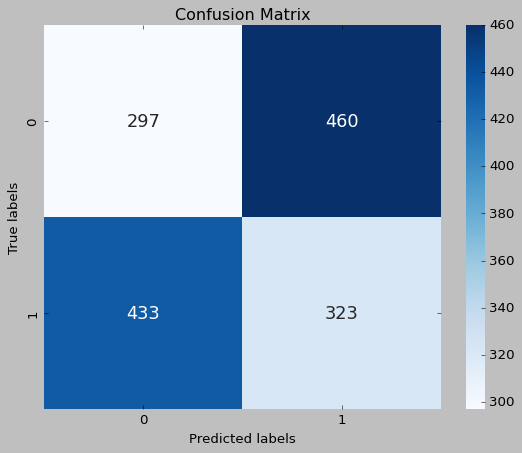

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
snst.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### **Explicação TSR**
A explicação foi realizada em um exemplo Sem Dispositivo Eletrônico (Quarta Imagem do Relatorio, sem dispositivo.). O método está presente na [documentação](https://fzi-forschungszentrum-informatik.github.io/TSInterpret/Notebooks/TSR_torch/) e foi desenvolvido por [Ismail et al. (2020)](https://arxiv.org/abs/2010.13924). O método funciona apenas com redes neurais, sendo portanto model-specific.


In [ ]:
item = merged_array_X[c_indexes[3]]#indices do array sem dispositivos eletronicos]

label = 0

Nesse Exemplo foi utilizado um método de saliência de Gradientes Integrados. Dentre os métodos estão disponíveis:

* Gradients (GRAD)
* Integrated Gradients (IG)
* Gradient Shap (GS)
* DeepLift (DL)
* DeepLiftShap (DLS)
* SmoothGrad (SG)
* Shapley Value Sampling(SVS)
* Feature Ablation (FA)
* Occlusion (FO)

In [ ]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model, X_train.shape[-2],X_train.shape[-1], method='IG',mode='time')

Mode in TF Saliency time


In [ ]:
exp=int_mod.explain(item.reshape(1,-1,1),labels=label,TSR =True)

In [ ]:
item.shape

(256, 1)

O método não conseguiu atribuir importância para nenhuma das janelas de tempo.

True
time mode


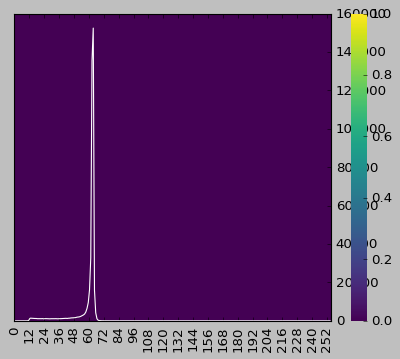

In [ ]:
%matplotlib inline
int_mod.plot(item.reshape(1,-1,1),exp)

O mapa de calor mostra que a importância (grau de saliencia) está aparentemente em 0, para toda a série.

True
time mode


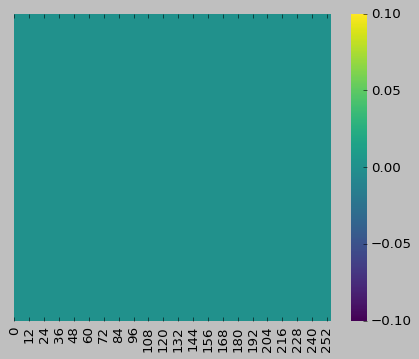

In [ ]:
%matplotlib inline
int_mod.plot(item.reshape(1,-1,1),exp,heatmap = True)

Devido ao exemplo anterior não ter conseguido atribuir nenhuma importâcia o modelo de explicabilidade também foi testado em um exemplo **Com Dispositivo Eletrônico**

In [ ]:
item = merged_array_X[c_indexesy[3]]#indices do array com dispositivos eletronicos]

label = 1

In [ ]:
from TSInterpret.InterpretabilityModels.Saliency.TSR import TSR
int_mod=TSR(model, X_train.shape[-2],X_train.shape[-1], method='IG',mode='time')

Mode in TF Saliency time


In [ ]:
exp=int_mod.explain(item.reshape(1,-1,1),labels=label,TSR =True)

In [ ]:
item.shape

(256, 1)

Neste Exemplo, uma alta importância é atribuída a quase toda a série temporal, mostrando que o comprotamento visualizado no mapa foi importante para o modelo prever a existência de um dispositivo eletrônico na maleta do exemplo.

True
time mode


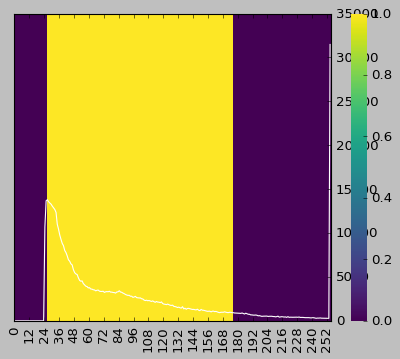

In [ ]:
%matplotlib inline
int_mod.plot(item.reshape(1,-1,1),exp)

O mapa de calor abaixo apenas mostra a importância atribuída a janela de tempo, excluindo a série da visualização.

True
time mode


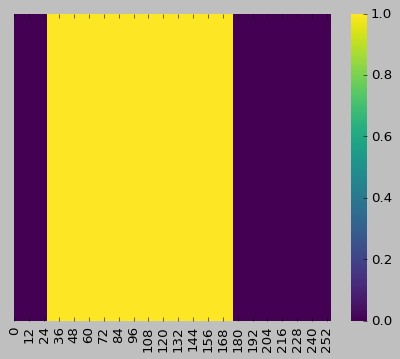

In [ ]:
%matplotlib inline
int_mod.plot(item.reshape(1,-1,1),exp,heatmap = True)

## **Conclusão**

Vale ressaltar que os métodos foram aplicados em uma série temporal univariada, alguns desses modelos podem lidar **somente** com séries univarias, outros podem lidar com séries multivariadas e univariadas e outros somente com séries multivariadas. No caso da escolha de um método de explicabilidade para um leigo e até para um profissional na área, seria interessante utilizar a explicação por contrafactuais, apesar da explicação do modelo LEFTIST também ser bastante útil para especialistas.

Imaginando um cenário onde uma pessoa é barrada em um aeroporto, séria fácil explicar o porquê dela ter sido barrada, mostrando o contraexemplo e dizer que como a série dela no sensor estava diferente da série quando não existe um aparelho eletrônico, ela foi barrada.

A explicação por contrafactuais é interessante até para ser utilziada em casos de falso positivos (ou seja, dizer que tem um dispositivo eletrônico quando na verdade não há), explicando que o modelo previu que havia um aparelho eletrônico pois a série que o sensor capturou, é diferente da série de raio x quando não existe um sensor eletrônico. Extrapolando, isso poderia evitar constrangimentos e até problemas judiciais.

#### Extra (Um exemplo da QuimioMetria)

Um exemplo ilustrativo foi criado na área da Quimiometria. Embora a análise exploratória seja limitada aqui, o objetivo é destacar o potencial da Quimiometria ao utilizar Inteligência Artificial (IA) e métodos de explicabilidade de modelos. O exemplo se concentra na detecção de câncer com base em conjuntos de dados obtidos a partir de medições de Matriz de Emissão de Excitação por Fluorescência (EEM) em amostras de plasma sanguíneo humano (plasma de citrato).

Esses dados são parte de um estudo multicêntrico realizado em seis hospitais dinamarqueses, onde pacientes passaram por endoscopia de cólon devido a sintomas associados ao câncer colorretal (CRC). Mais detalhes sobre o estudo podem ser encontrados neste [link](https://ucphchemometrics.com/2023/05/04/fluorescence-on-blood-plasma-for-cancer-diagnosis/).

Para simplificar a análise, visto que a estrutura e preprocessamento de dados do matplotlib para o python é bastante complexa, utilizamos apenas a variável X_HW e as classes de câncer (positivo/negativo). A Quimiometria é uma disciplina que se concentra na aplicação de métodos estatísticos e matemáticos para resolver problemas em química analítica, incluindo análise de dados complexos gerados por técnicas como espectroscopia e cromatografia.

O uso de IA e técnicas de aprendizado de máquina na Quimiometria tem o potencial de otimizar a análise e interpretação de dados químicos complexos, como os obtidos a partir de EEM. Além disso, a explicabilidade de modelos é crucial nesta área para compreender como os modelos de IA tomam decisões importantes, especialmente em aplicações biomédicas, como o diagnóstico de câncer com base em dados de plasma sanguíneo.

Por meio da combinação da Quimiometria com IA e métodos de explicabilidade de modelos, espera-se que avanços significantes na análise de dados químicos e na interpretação de resultados clínicos sejam alcançados, contribuindo assim para avanços importantes em diagnóstico e tratamento de doenças.

In [ ]:
!apt-get install wget
!wget -O CancerFLu.zip https://ucphchemometrics.com/wp-content/uploads/2023/05/CancerFLu.zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-04-11 00:01:37--  https://ucphchemometrics.com/wp-content/uploads/2023/05/CancerFLu.zip
Resolving ucphchemometrics.com (ucphchemometrics.com)... 192.0.78.155, 192.0.78.251
Connecting to ucphchemometrics.com (ucphchemometrics.com)|192.0.78.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40817001 (39M) [application/zip]
Saving to: ‘CancerFLu.zip’

CancerFLu.zip       100%[===================>]  38.93M  75.7MB/s    in 0.5s    

2024-04-11 00:01:37 (75.7 MB/s) - ‘CancerFLu.zip’ saved [40817001/40817001]



In [ ]:
!unzip /content/CancerFLu.zip


Archive:  /content/CancerFLu.zip
replace datafornet.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/datafornet.mat')

In [ ]:
import numpy as np

In [ ]:

quantity = np.array(mat['X_HW'][[0]])[[0]][0][0][7]

In [ ]:
labels = np.array(mat['X_UD'])[0][0][12][0][0][3]

In [ ]:
quantity.shape

(299, 96, 9)

In [ ]:
labels.shape

(1, 299)

In [ ]:
y = labels.reshape(-1)
y.shape

(299,)

In [ ]:
np.unique(y)

array([1, 2], dtype=uint8)

In [ ]:
quantity[:,:,0].shape

(299, 96)

In [ ]:
X = quantity
X.shape

(299, 96, 9)

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc1=OneHotEncoder(sparse=False).fit(y_train.reshape(-1,1))
y_train=enc1.transform(y_train.reshape(-1,1))
y_test=enc1.transform(y_test.reshape(-1,1))

In [ ]:
X_train.shape

(239, 96, 9)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Conv1D, Flatten,Dropout
# Assuming train_x shape is (num_samples, time_steps, num_features)
num_time_steps = X_train.shape[1]
num_features = X_train.shape[2]
num_classes = 2  # Number of output classes (adjust as needed)

model = Sequential([
    Conv1D(filters=64, kernel_size=(1), input_shape=(num_time_steps, num_features)),
    LSTM(32),  # LSTM layer with 64 units
    Flatten(),
    Dropout(0.7),
    Dense(3),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(loss='categorical_crossentropy',  # Use sparse categorical crossentropy for integer targets
              optimizer='adam',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 96, 64)            640       
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_9 (Dense)             (None, 2)                

In [ ]:
# Train the model
num_epochs = 10
batch_size = 1

model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/10
239/239 [==============================] - 6s 16ms/step - loss: 0.6998 - accuracy: 0.5314
Epoch 2/10
239/239 [==============================] - 4s 16ms/step - loss: 0.7021 - accuracy: 0.4561
Epoch 3/10
239/239 [==============================] - 4s 15ms/step - loss: 0.6999 - accuracy: 0.4854
Epoch 4/10
239/239 [==============================] - 4s 16ms/step - loss: 0.6956 - accuracy: 0.5146
Epoch 5/10
239/239 [==============================] - 4s 16ms/step - loss: 0.6995 - accuracy: 0.5314
Epoch 6/10
239/239 [==============================] - 4s 15ms/step - loss: 0.7009 - accuracy: 0.4937
Epoch 7/10
239/239 [==============================] - 4s 15ms/step - loss: 0.6966 - accuracy: 0.5188
Epoch 8/10
239/239 [==============================] - 4s 16ms/step - loss: 0.6910 - accuracy: 0.5272
Epoch 9/10
239/239 [==============================] - 4s 15ms/step - loss: 0.6948 - accuracy: 0.5230
Epoch 10/10
239/239 [==============================] - 4s 15ms/step - loss: 0.6957 - accura

In [ ]:
# Assuming train_y and test_y are one-hot encoded
# Convert one-hot encoded labels back to integer labels
train_labels = np.argmax(y_train, axis=1)
test_labels = np.argmax(y_test, axis=1)

# Assuming you have already trained your model
# model.fit(X_train, train_labels)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate classification report
print("Classification Report:")
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

# Calculate confusion matrix
conf_mat = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_mat)

2/2 [==============================] - 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       0.00      0.00      0.00        32

    accuracy                           0.47        60
   macro avg       0.23      0.50      0.32        60
weighted avg       0.22      0.47      0.30        60

Confusion Matrix:
[[28  0]
 [32  0]]


In [ ]:
X_test[4].shape

(96, 9)

In [ ]:
X_train.shape

(239, 96, 9)

In [ ]:
X_test[0].shape

(96, 9)

In [ ]:
y_target= model.predict(X_test[0].reshape(1,-1,9))
#pred_y=  model.predict(X_train)

1/1 [==============================] - 0s 20ms/step


In [ ]:
y_target

array([[0.52233624, 0.47766373]], dtype=float32)

In [ ]:
X_train[4].shape

(96, 9)

In [ ]:
explained_instance = X_train[20].reshape(1,-1,9)
label=y_train[20]
nb_interpretable_feature = 10
explanation_size = 1
nb_neighbors = 1
learning_process_name = 'Lime'
transform_name = 'uniform'

In [ ]:
explained_instance.shape

(1, 96, 9)

In [ ]:
X_test.shape

(60, 96, 9)

In [ ]:
from TSInterpret.InterpretabilityModels.counterfactual.TSEvoCF import TSEvo
exp =TSEvo(model= model,data=(X_test,y_test), mode = 'feat',backend='TF',epochs =2)

y was one Hot Encoded


In [ ]:
np.array(y_test[0].argmax()).reshape(1,).shape

(1,)

In [ ]:
observation_01 = X_test[0]
label_01=np.array(y_test[0].argmax()).reshape(1,)
print(observation_01.shape)
print(label_01.shape)

(96, 9)
(1,)


In [ ]:
observation_01.reshape(1,1,-1).shape

(1, 1, 864)

In [ ]:
pop,label_cf=exp.explain(observation_01.reshape(1,96,9),np.array(label_01))

No Target


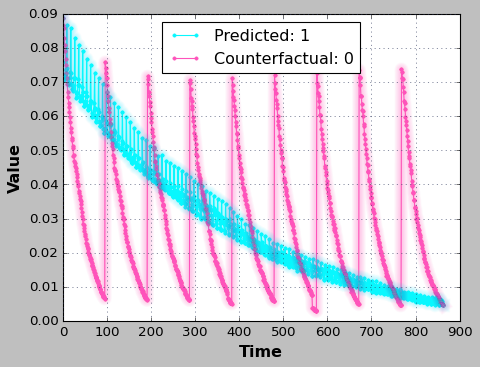

In [ ]:
exp.plot_in_one(observation_01.reshape(1,96*9),label_01[0],pop,np.argmax(label_cf),save_fig=None)
